# Premier League Match Result Prediction (W/D/L)


## 1. Data Loading & Cleaning


In [168]:
import pandas as pd
import numpy as np

In [169]:
df = pd.read_csv('../prem_data.csv')
df.head()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,xG_y,Tkl,Tkl.1,TklW,Int,Clr,Blocks,Err,Season,Team
0,1,2023-08-11,20:00 (04:00),Premier League,Matchweek 1,Fri,Away,W,3,0,...,1.9,17,12,12,4,7,9,2,2024,Manchester-City
1,3,2023-08-19,20:00 (04:00),Premier League,Matchweek 2,Sat,Home,W,1,0,...,1.0,11,4,7,4,10,9,1,2024,Manchester-City
2,4,2023-08-27,14:00 (22:00),Premier League,Matchweek 3,Sun,Away,W,2,1,...,3.5,12,7,8,4,6,10,0,2024,Manchester-City
3,5,2023-09-02,15:00 (23:00),Premier League,Matchweek 4,Sat,Home,W,5,1,...,2.2,17,6,10,8,11,2,0,2024,Manchester-City
4,6,2023-09-16,15:00 (23:00),Premier League,Matchweek 5,Sat,Away,W,3,1,...,3.6,11,5,7,7,9,7,0,2024,Manchester-City


In [170]:
assert (df['xG_x'] == df['xG_y']).all(), 'xG_x and xG_y are different' # test if xG_x and xG_y both refers to expected goals 
print('xG_x and xG_y are identical.')

xG_x and xG_y are identical.


In [171]:
df = df.drop(columns = ['xG_x']).rename(columns = {'xG_y': 'xG'}) # drop xG_y and rename xG_x since no error message was generated from assert line
df = df.drop(columns = ['Tkl.1']) # don't need 'dribblers' tackled data as we already have Tkl data

df.head()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,PK,xG,Tkl,TklW,Int,Clr,Blocks,Err,Season,Team
0,1,2023-08-11,20:00 (04:00),Premier League,Matchweek 1,Fri,Away,W,3,0,...,0,1.9,17,12,4,7,9,2,2024,Manchester-City
1,3,2023-08-19,20:00 (04:00),Premier League,Matchweek 2,Sat,Home,W,1,0,...,0,1.0,11,7,4,10,9,1,2024,Manchester-City
2,4,2023-08-27,14:00 (22:00),Premier League,Matchweek 3,Sun,Away,W,2,1,...,0,3.5,12,8,4,6,10,0,2024,Manchester-City
3,5,2023-09-02,15:00 (23:00),Premier League,Matchweek 4,Sat,Home,W,5,1,...,1,2.2,17,10,8,11,2,0,2024,Manchester-City
4,6,2023-09-16,15:00 (23:00),Premier League,Matchweek 5,Sat,Away,W,3,1,...,0,3.6,11,7,7,9,7,0,2024,Manchester-City


In [172]:
df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'xGA', 'Poss', 'Attendance', 'Captain',
       'Formation', 'Opp Formation', 'Referee', 'Match Report', 'Notes', 'Sh',
       'SoT', 'Dist', 'FK', 'PK', 'xG', 'Tkl', 'TklW', 'Int', 'Clr', 'Blocks',
       'Err', 'Season', 'Team'],
      dtype='object')

In [173]:
useless_cols = ['Unnamed: 0', 'Time', 'Comp', 'Round', 'Day', 'Attendance', 'Captain', 'Formation', 'Opp Formation', 'Referee', 'Match Report', 'Notes']
df = df.drop(columns = useless_cols) # drop unnecessary columns 

In [174]:
print(df['Team'].unique()) 
print(df['Opponent'].unique())

['Manchester-City' 'Arsenal' 'Liverpool' 'Aston-Villa' 'Tottenham-Hotspur'
 'Chelsea' 'Newcastle-United' 'Manchester-United' 'West-Ham-United'
 'Crystal-Palace' 'Brighton-and-Hove-Albion' 'Bournemouth' 'Fulham'
 'Wolverhampton-Wanderers' 'Everton' 'Brentford' 'Nottingham-Forest'
 'Luton-Town' 'Burnley' 'Sheffield-United' 'Leicester-City' 'Leeds-United'
 'Southampton' 'Watford' 'Norwich-City']
['Burnley' 'Newcastle Utd' 'Sheffield Utd' 'Fulham' 'West Ham'
 "Nott'ham Forest" 'Wolves' 'Arsenal' 'Brighton' 'Manchester Utd'
 'Bournemouth' 'Chelsea' 'Liverpool' 'Tottenham' 'Aston Villa'
 'Luton Town' 'Crystal Palace' 'Everton' 'Brentford' 'Manchester City'
 'Southampton' 'Leicester City' 'Leeds United' 'Norwich City' 'Watford']


In [175]:
team_dict = {
    'Manchester-City': 'Manchester City',
    'Arsenal' : 'Arsenal',
    'Liverpool' : 'Liverpool',
    'Aston-Villa' : 'Aston Villa',
    'Tottenham-Hotspur': 'Tottenham',
    'Chelsea' : 'Chelsea',
    'Newcastle-United' : 'Newcastle Utd',
    'Manchester-United' : 'Manchester Utd',
    'West-Ham-United' : 'West Ham',
    'Crystal-Palace' : 'Crystal Palace',
    'Brighton-and-Hove-Albion' : 'Brighton',
    'Bournemouth' : 'Bournemouth',
    'Fulham' : 'Fulham',
    'Wolverhampton-Wanderers' : 'Wolves',
    'Everton' : 'Everton',
    'Brentford' : 'Brentford',
    'Nottingham-Forest' : "Nott'ham Forest",
    'Luton-Town' : 'Luton Town',
    'Burnley' : 'Burnley',
    'Sheffield-United' : 'Sheffield Utd',
    'Leicester-City' :  'Leicester City',
    'Leeds-United' : 'Leeds United',
    'Southampton' : 'Southampton', 
    'Watford' : 'Watford',
    'Norwich-City' : 'Norwich City'
}
df['Team'] = df["Team"].map(team_dict) # standardize team name by applying team_dict

print(sorted(df['Team'].unique()) == sorted(df['Opponent'].unique())) # check if the home team names & away team names are identical
df.head()


True


,Date,Venue,Result,GF,GA,Opponent,xGA,Poss,Sh,SoT,...,PK,xG,Tkl,TklW,Int,Clr,Blocks,Err,Season,Team
0,2023-08-11,Away,W,3,0,Burnley,0.3,65,17,8,...,0,1.9,17,12,4,7,9,2,2024,Manchester City
1,2023-08-19,Home,W,1,0,Newcastle Utd,0.3,59,14,4,...,0,1.0,11,7,4,10,9,1,2024,Manchester City
2,2023-08-27,Away,W,2,1,Sheffield Utd,0.7,79,29,9,...,0,3.5,12,8,4,6,10,0,2024,Manchester City
3,2023-09-02,Home,W,5,1,Fulham,1.4,68,6,4,...,1,2.2,17,10,8,11,2,0,2024,Manchester City
4,2023-09-16,Away,W,3,1,West Ham,0.9,68,29,13,...,0,3.6,11,7,7,9,7,0,2024,Manchester City


## 2. Feature Engineering

In [176]:
df['Date'] = pd.to_datetime(df['Date']) # convert 'Date' column to datetime type
df['is_home'] = (df['Venue']=='Home').astype(int) # encode venue as binary home/away
df['Opponent_code'] = df['Opponent'].astype('category').cat.codes # encode opponent team as categorical code
df.head()

,Date,Venue,Result,GF,GA,Opponent,xGA,Poss,Sh,SoT,...,Tkl,TklW,Int,Clr,Blocks,Err,Season,Team,is_home,Opponent_code
0,2023-08-11,Away,W,3,0,Burnley,0.3,65,17,8,...,17,12,4,7,9,2,2024,Manchester City,0,5
1,2023-08-19,Home,W,1,0,Newcastle Utd,0.3,59,14,4,...,11,7,4,10,9,1,2024,Manchester City,1,16
2,2023-08-27,Away,W,2,1,Sheffield Utd,0.7,79,29,9,...,12,8,4,6,10,0,2024,Manchester City,0,19
3,2023-09-02,Home,W,5,1,Fulham,1.4,68,6,4,...,17,10,8,11,2,0,2024,Manchester City,1,9
4,2023-09-16,Away,W,3,1,West Ham,0.9,68,29,13,...,11,7,7,9,7,0,2024,Manchester City,0,23


In [177]:
df = df.sort_values(['Team', 'Date']) # sort matches chronologically by team
df.head()

,Date,Venue,Result,GF,GA,Opponent,xGA,Poss,Sh,SoT,...,Tkl,TklW,Int,Clr,Blocks,Err,Season,Team,is_home,Opponent_code
1672,2021-08-13,Away,L,0,2,Brentford,1.2,64,22,4,...,9,3,7,15,10,0,2022,Arsenal,0,3
1673,2021-08-22,Home,L,0,2,Chelsea,3.1,35,6,3,...,20,17,6,12,20,0,2022,Arsenal,1,6
1674,2021-08-28,Away,L,0,5,Manchester City,4.4,20,1,0,...,9,6,12,30,14,1,2022,Arsenal,0,14
1675,2021-09-11,Home,W,1,0,Norwich City,0.7,51,30,6,...,16,11,3,18,15,0,2022,Arsenal,1,17
1676,2021-09-18,Away,W,1,0,Burnley,1.0,54,13,3,...,18,8,11,39,11,1,2022,Arsenal,0,5


In [178]:
# Calculate rolling averages of specified columns
def add_rolling_stats(df, cols, window, prefix): 
    roll = df[cols].shift(1).rolling(window).mean() # Shift to avoid data leakage
    roll.columns = [f"{prefix}_{col}_avg{window}" for col in cols]
    return pd.concat([df, roll], axis=1)

In [179]:
dist = df['Result'].value_counts(normalize=True).mul(100).round(1)
print(dist)

Result
L    38.7
W    38.7
D    22.5
Name: proportion, dtype: float64


In [180]:
df['xG_diff'] = df['xG'] - df['xGA'] # create xG difference feature
df['Result'] = df['Result'].map({'W': 2, 'D': 1, 'L': 0}) # map match result to numeric values
cols = ['GF', 'GA', 'SoT', 'FK', 'PK', 'xG_diff', 'Result']
df = df.groupby('Team').apply(lambda x: add_rolling_stats(x, cols, 5, 'Recent'))
df.head(10)

/var/folders/q1/xzbrckf15fjgp4bmp0y5w4ww0000gn/T/ipykernel_45049/565162445.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Team').apply(lambda x: add_rolling_stats(x, cols, 5, 'Recent'))


Date Venue  Result  GF  GA         Opponent  xGA  Poss  Sh  \
Team                                                                            
Arsenal 1672 2021-08-13  Away       0   0   2        Brentford  1.2    64  22   
        1673 2021-08-22  Home       0   0   2          Chelsea  3.1    35   6   
        1674 2021-08-28  Away       0   0   5  Manchester City  4.4    20   1   
        1675 2021-09-11  Home       2   1   0     Norwich City  0.7    51  30   
        1676 2021-09-18  Away       2   1   0          Burnley  1.0    54  13   
        1677 2021-09-26  Home       2   3   1        Tottenham  1.0    46  12   
        1678 2021-10-02  Away       1   0   0         Brighton  1.1    42   8   
        1679 2021-10-18  Home       1   2   2   Crystal Palace  0.7    54  17   
        1680 2021-10-22  Home       2   3   1      Aston Villa  1.4    53  21   
        1681 2021-10-30  Away       2   2   0   Leicester City  1.3    36   9   

              SoT  ...  is_home  Opponent_code  xG_diff  Recent_GF_avg5  \
Team               ...                                                    
Arsenal 1672    4  ...        0              3      0.1             NaN   
        1673    3  ...        1              6     -2.8             NaN   
        1674    0  ...        0             14     -4.2             NaN   
        1675    6  ...        1             17      2.0             NaN   
        1676    3  ...        0              5      0.1             NaN   
        1677    7  ...        1             21      0.1             0.4   
        1678    2  ...        0              4     -0.7             1.0   
        1679    6  ...        1              7      1.0             1.0   
        1680    8  ...        1              1      1.3             1.4   
        1681    5  ...        0             11     -0.6             1.8   

              Recent_GA_avg5  Recent_SoT_avg5  Recent_FK_avg5  Recent_PK_avg5  \
Team                                                                            
Arsenal 1672             NaN              NaN             NaN             NaN   
        1673             NaN              NaN             NaN             NaN   
        1674             NaN              NaN             NaN             NaN   
        1675             NaN              NaN             NaN             NaN   
        1676             NaN              NaN             NaN             NaN   
        1677             1.8              3.2             0.6             0.0   
        1678             1.6              3.8             0.4             0.0   
        1679             1.2              3.6             0.6             0.0   
        1680             0.6              4.8             0.8             0.0   
        1681             0.8              5.2             0.8             0.0   

              Recent_xG_diff_avg5  Recent_Result_avg5  
Team                                                   
Arsenal 1672                  NaN                 NaN  
        1673                  NaN                 NaN  
        1674                  NaN                 NaN  
        1675                  NaN                 NaN  
        1676                  NaN                 NaN  
        1677                -0.96                 0.8  
        1678                -0.96                 1.2  
        1679                -0.54                 1.4  
        1680                 0.50                 1.6  
        1681                 0.36                 1.6  

[10 rows x 32 columns]

In [181]:
df = df.reset_index(drop = True)
df.head(10)

,Date,Venue,Result,GF,GA,Opponent,xGA,Poss,Sh,SoT,...,is_home,Opponent_code,xG_diff,Recent_GF_avg5,Recent_GA_avg5,Recent_SoT_avg5,Recent_FK_avg5,Recent_PK_avg5,Recent_xG_diff_avg5,Recent_Result_avg5
0,2021-08-13,Away,0,0,2,Brentford,1.2,64,22,4,...,0,3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-22,Home,0,0,2,Chelsea,3.1,35,6,3,...,1,6,-2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-28,Away,0,0,5,Manchester City,4.4,20,1,0,...,0,14,-4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-11,Home,2,1,0,Norwich City,0.7,51,30,6,...,1,17,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-18,Away,2,1,0,Burnley,1.0,54,13,3,...,0,5,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-09-26,Home,2,3,1,Tottenham,1.0,46,12,7,...,1,21,0.1,0.4,1.8,3.2,0.6,0.0,-0.96,0.8
6,2021-10-02,Away,1,0,0,Brighton,1.1,42,8,2,...,0,4,-0.7,1.0,1.6,3.8,0.4,0.0,-0.96,1.2
7,2021-10-18,Home,1,2,2,Crystal Palace,0.7,54,17,6,...,1,7,1.0,1.0,1.2,3.6,0.6,0.0,-0.54,1.4
8,2021-10-22,Home,2,3,1,Aston Villa,1.4,53,21,8,...,1,1,1.3,1.4,0.6,4.8,0.8,0.0,0.50,1.6
9,2021-10-30,Away,2,2,0,Leicester City,1.3,36,9,5,...,0,11,-0.6,1.8,0.8,5.2,0.8,0.0,0.36,1.6


In [182]:
df = df.sort_values(['Team', 'Opponent', 'Date'])
# avg result of previous 2 head-to-heads (Team vs Opponent)
df['h2h_record'] = (df.groupby(['Team', 'Opponent'])['Result']
                    .apply(lambda x: x.shift(1).rolling(2).mean()) 
                    .reset_index(level=[0,1], drop=True)
                    .fillna(0)) 
df.head(50) 


,Date,Venue,Result,GF,GA,Opponent,xGA,Poss,Sh,SoT,...,Opponent_code,xG_diff,Recent_GF_avg5,Recent_GA_avg5,Recent_SoT_avg5,Recent_FK_avg5,Recent_PK_avg5,Recent_xG_diff_avg5,Recent_Result_avg5,h2h_record
8,2021-10-22,Home,2,3,1,Aston Villa,1.4,53,21,8,...,1,1.3,1.4,0.6,4.8,0.8,0.0,0.50,1.6,0.0
27,2022-03-19,Away,2,1,0,Aston Villa,0.5,53,10,3,...,1,0.8,1.8,1.2,4.8,0.2,0.2,0.98,1.6,0.0
42,2022-08-31,Home,2,2,1,Aston Villa,0.4,59,22,8,...,1,2.0,3.2,0.8,6.2,0.4,0.2,1.58,2.0,2.0
60,2023-02-18,Away,2,4,2,Aston Villa,0.5,67,20,5,...,1,2.7,1.4,1.4,3.8,0.4,0.2,0.30,1.0,2.0
91,2023-12-09,Away,0,0,1,Aston Villa,0.6,61,12,3,...,1,0.8,2.0,1.2,5.2,0.0,0.0,1.08,1.6,2.0
107,2024-04-14,Home,0,0,2,Aston Villa,0.9,52,18,4,...,1,0.7,2.6,0.2,5.2,0.2,0.2,1.08,1.8,1.0
40,2022-08-20,Away,2,3,0,Bournemouth,0.3,57,14,6,...,2,1.0,2.2,1.6,4.8,0.2,0.2,0.38,1.2,0.0
63,2023-03-04,Home,2,3,2,Bournemouth,1.3,79,31,9,...,2,0.8,2.2,1.2,3.8,0.2,0.2,0.80,1.4,0.0
82,2023-09-30,Away,2,4,0,Bournemouth,0.6,57,13,6,...,2,2.8,1.8,1.0,4.8,0.0,0.6,1.22,1.6,2.0
111,2024-05-04,Home,2,3,0,Bournemouth,0.5,55,24,8,...,2,2.8,2.6,0.8,6.4,0.4,0.2,1.00,1.6,2.0


In [183]:
df.columns

Index(['Date', 'Venue', 'Result', 'GF', 'GA', 'Opponent', 'xGA', 'Poss', 'Sh',
       'SoT', 'Dist', 'FK', 'PK', 'xG', 'Tkl', 'TklW', 'Int', 'Clr', 'Blocks',
       'Err', 'Season', 'Team', 'is_home', 'Opponent_code', 'xG_diff',
       'Recent_GF_avg5', 'Recent_GA_avg5', 'Recent_SoT_avg5', 'Recent_FK_avg5',
       'Recent_PK_avg5', 'Recent_xG_diff_avg5', 'Recent_Result_avg5',
       'h2h_record'],
      dtype='object')

## 3. Create Prediction Model Using RandomForest, GradientBoost, XGBoost

In [184]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

### 3-1. Use recent 5 match stats for rolling average columns

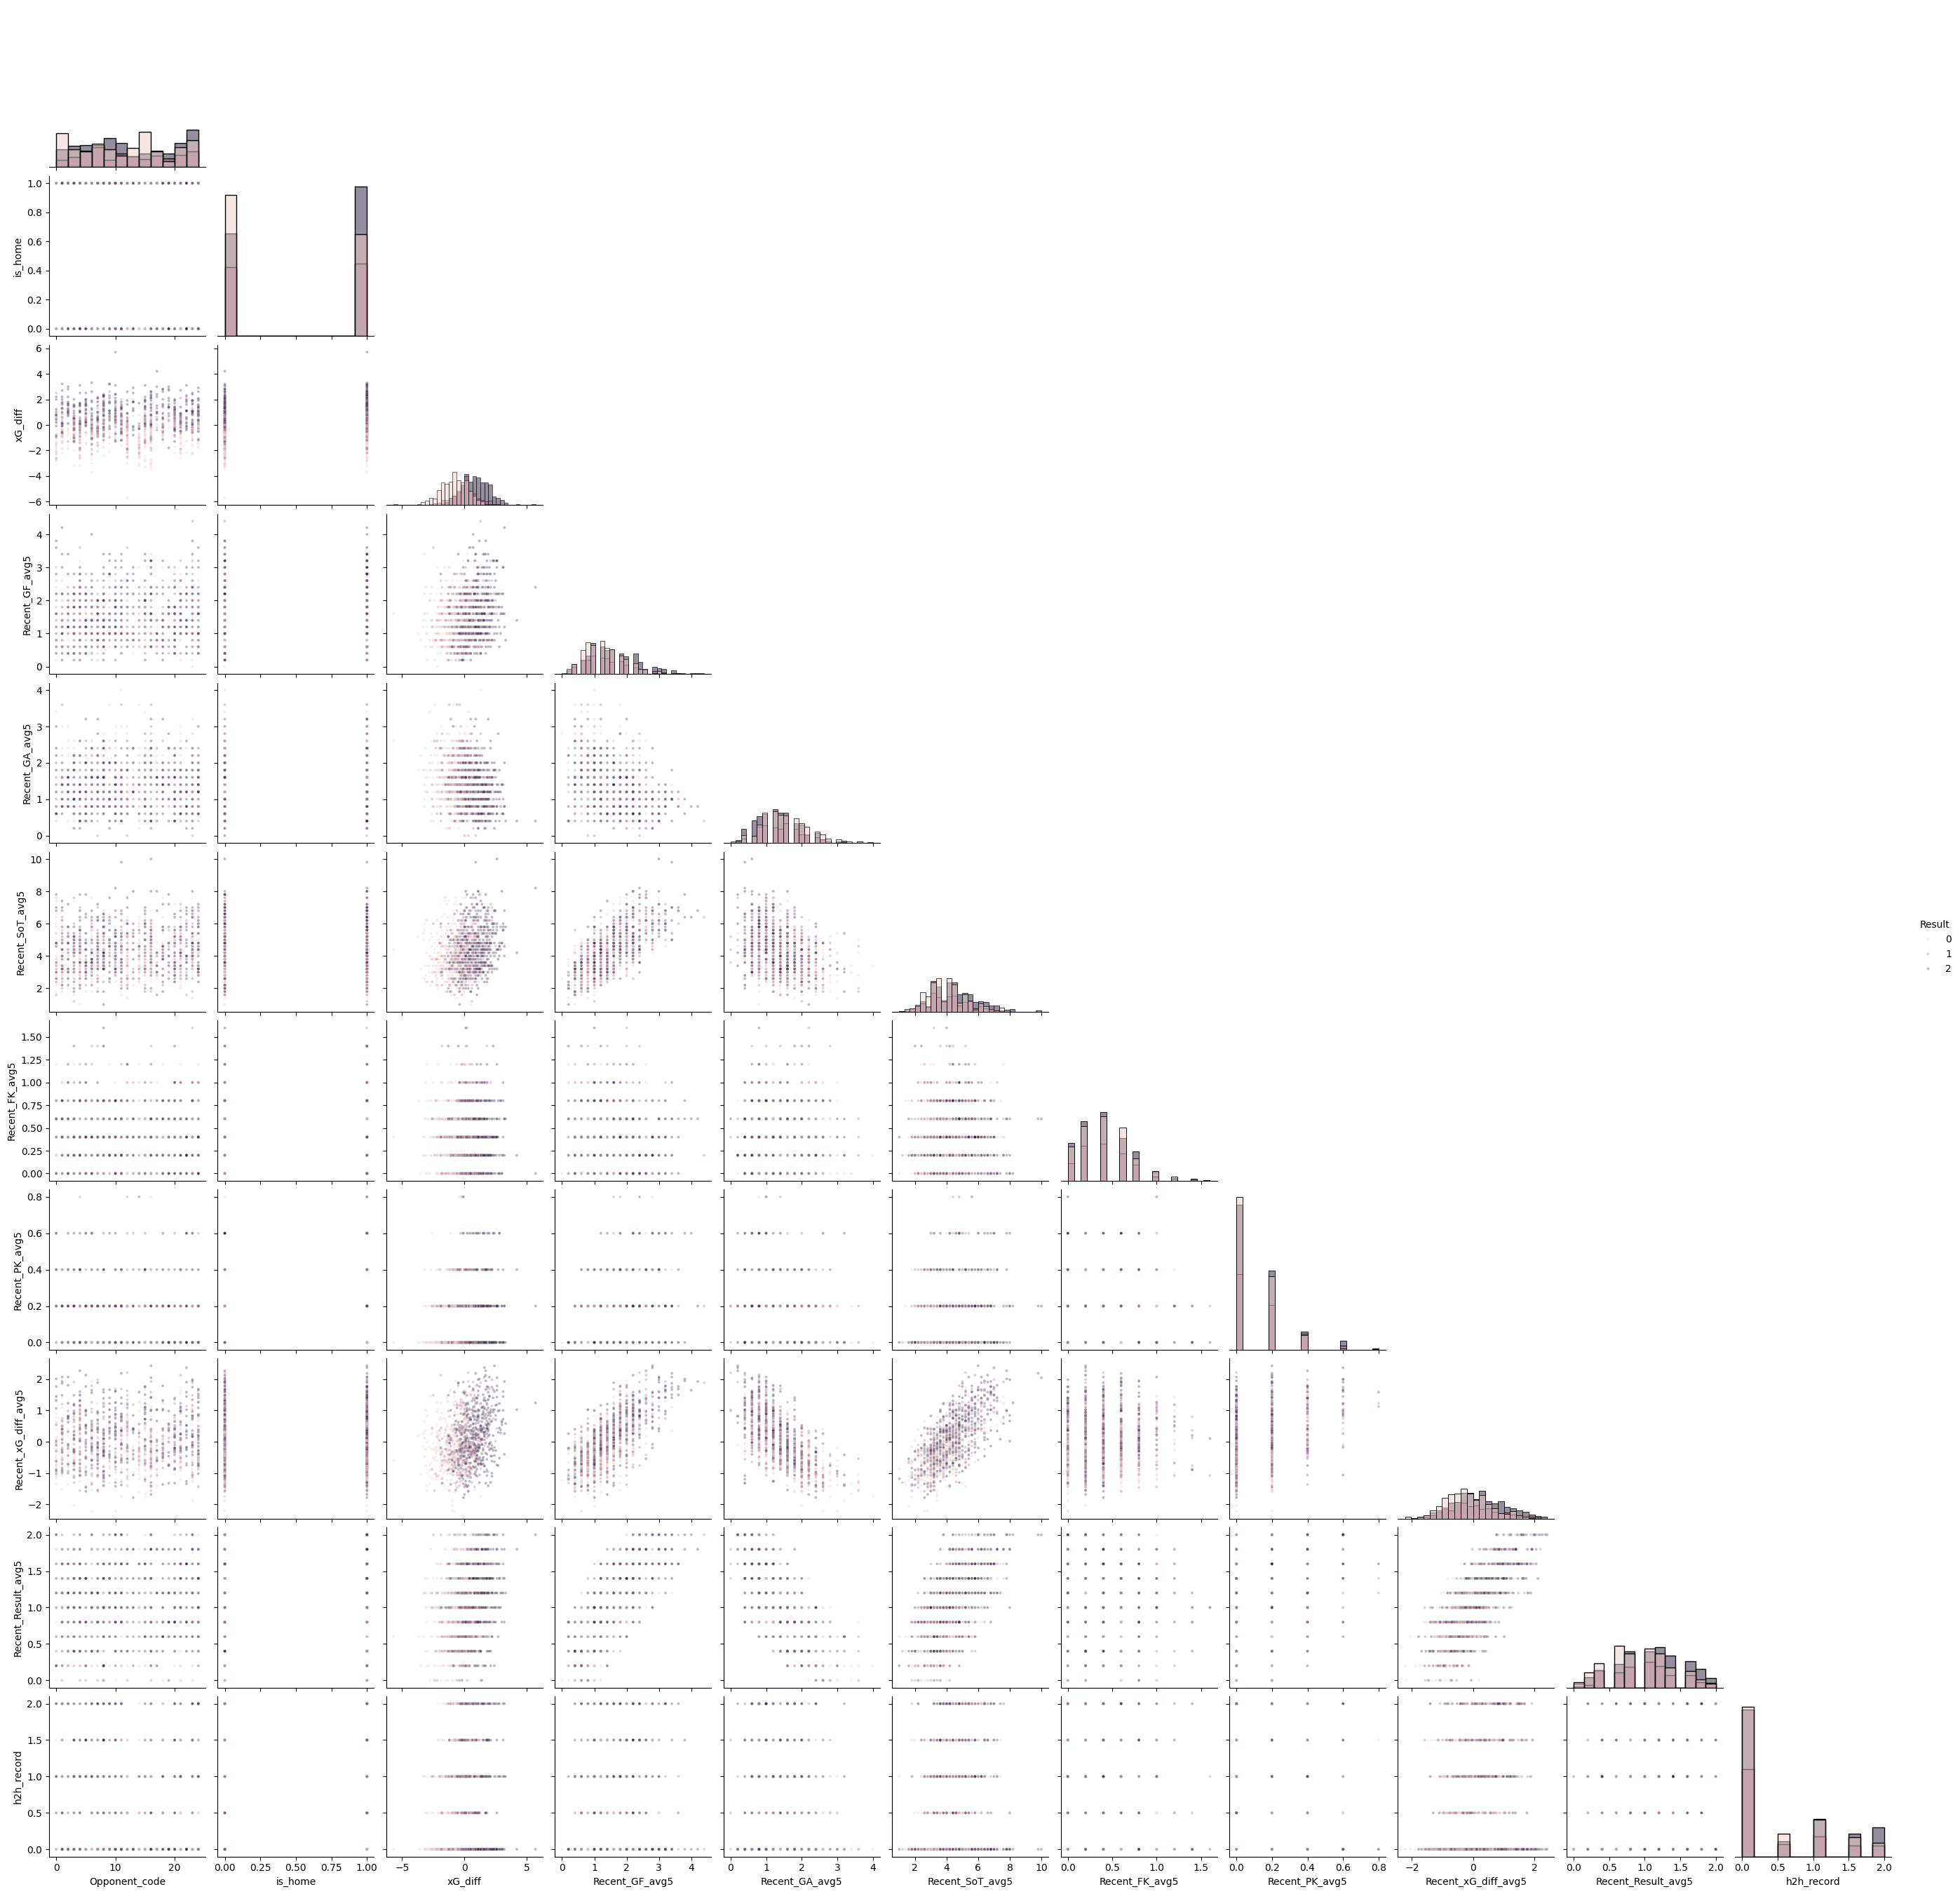

In [185]:
feature_cols = (['Opponent_code', 'is_home', 'xG_diff', 'Recent_GF_avg5',
                 'Recent_GA_avg5', 'Recent_SoT_avg5', 'Recent_FK_avg5', 'Recent_PK_avg5',
                 'Recent_xG_diff_avg5', 'Recent_Result_avg5', 'h2h_record'])

df = df.sort_values('Date')
train = df[df['Date'] < '2024-01-01'].dropna(subset = feature_cols + ['Result'])
test  = df[df['Date'] >= '2024-01-01'].dropna(subset = feature_cols + ['Result'])

X_train = train[feature_cols]
y_train = train['Result'].astype(int)

X_test = test[feature_cols]
y_test = test['Result'].astype(int)

# visualize pairwise feature relationships by match result using training data
plot_df = train[feature_cols + ['Result']].sample(1200, random_state=42)
sns.pairplot(
    plot_df,
    hue='Result',          
    diag_kind='hist',      
    corner=True,          
    plot_kws={'s': 8, 'alpha': 0.3}
)

plt.show()


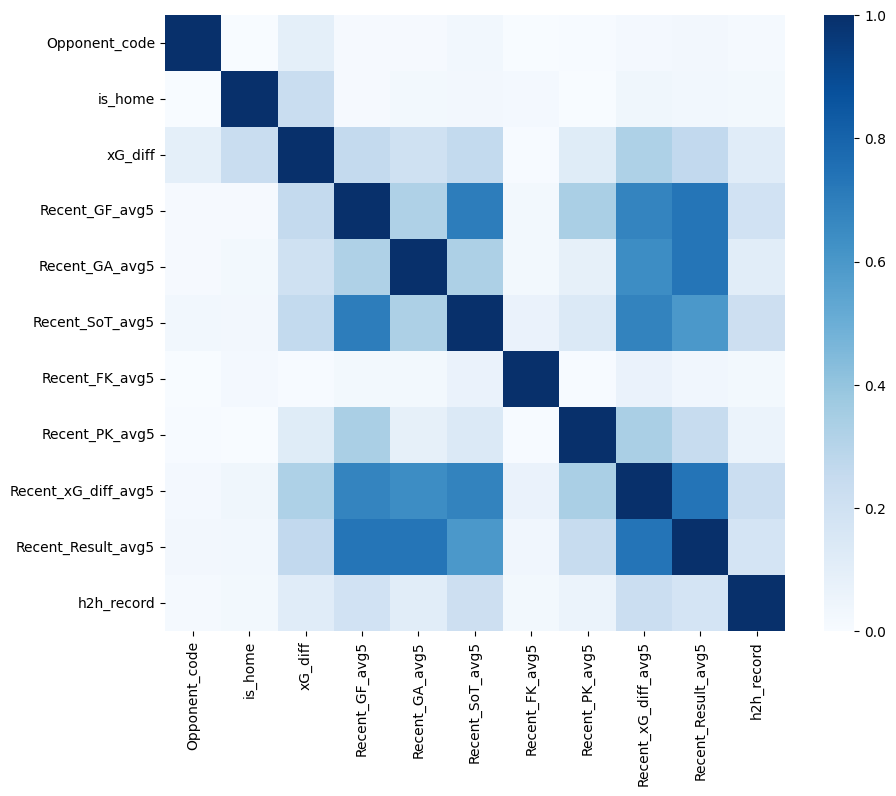

Drop candidates: []


In [186]:
# Compute and visualize correlation heatmap
corr = X_train[feature_cols].corr().abs()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='Blues', vmin=0, vmax=1)
plt.show()

threshold = 0.85
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
print("Drop candidates:", to_drop)

In [187]:
# time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# parameter grid for RandomForest Model
param_grid_rf = {
    'n_estimators':    [100, 200],
    'max_depth':       [5, 10, 20],
    'min_samples_split':[2, 5]
}
# parameter grid for GradientBoosting 
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate':[0.01, 0.1],
    'max_depth':    [3, 5]
}
# parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth':    [3, 5, 7],
    'learning_rate':[0.01, 0.1],
    'subsample':    [0.8, 1.0]
}


## 4. Model Evaluation

### 4-1. Model Evaluation with columns that were feature-engineered with recent five match stats

In [188]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# tune hyperparameters using GridSearchCV and evaluate model performance
def tune_and_evaluate(estimator, param_grid, model):
    grid = GridSearchCV(
        estimator = estimator,
        param_grid = param_grid,
        cv = tscv,
        scoring = 'f1_macro',
        refit = True
    )
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average = 'macro')

    print(f'\n[{model}] Best Params: {grid.best_params_}')
    print(f'[{model}] Test Macro-F1: {f1:.4f}')
    print(classification_report(y_test, y_pred, target_names=['L','D','W']))
    
    return model, best_model, f1
    

In [189]:
# tune and evaluate multiple models, storing results for comparison
results = []
results.append(
    tune_and_evaluate(RandomForestClassifier(random_state=42, class_weight = 'balanced'), param_grid_rf, 'RandomForest')
)
results.append(
    tune_and_evaluate(GradientBoostingClassifier(random_state=42), param_grid_gb, 'GradientBoosting')
)
results.append(
    tune_and_evaluate(xgb.XGBClassifier(eval_metric='mlogloss', random_state=42), param_grid_xgb, 'XGBoost')
)


[RandomForest] Best Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
[RandomForest] Test Macro-F1: 0.5612
              precision    recall  f1-score   support

           L       0.63      0.69      0.66       138
           D       0.38      0.32      0.35        92
           W       0.67      0.69      0.68       138

    accuracy                           0.60       368
   macro avg       0.56      0.56      0.56       368
weighted avg       0.58      0.60      0.59       368


[GradientBoosting] Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
[GradientBoosting] Test Macro-F1: 0.4844
              precision    recall  f1-score   support

           L       0.61      0.76      0.68       138
           D       0.26      0.05      0.09        92
           W       0.61      0.78      0.68       138

    accuracy                           0.59       368
   macro avg       0.49      0.53      0.48       368
weighted avg       0.52      0.

### 3-2. Use recent 3 match stats for rolling average columns

In [190]:
df = df.sort_values('Date')
cols = ['GF', 'GA', 'SoT', 'FK', 'PK', 'xG_diff', 'Result']
df = df.groupby('Team').apply(lambda x: add_rolling_stats(x, cols, 3, 'Recent'))
df = df.reset_index(drop = True)
df.head()

/var/folders/q1/xzbrckf15fjgp4bmp0y5w4ww0000gn/T/ipykernel_45049/2962513271.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Team').apply(lambda x: add_rolling_stats(x, cols, 3, 'Recent'))


,Date,Venue,Result,GF,GA,Opponent,xGA,Poss,Sh,SoT,...,Recent_xG_diff_avg5,Recent_Result_avg5,h2h_record,Recent_GF_avg3,Recent_GA_avg3,Recent_SoT_avg3,Recent_FK_avg3,Recent_PK_avg3,Recent_xG_diff_avg3,Recent_Result_avg3
0,2021-08-13,Away,0,0,2,Brentford,1.2,64,22,4,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-22,Home,0,0,2,Chelsea,3.1,35,6,3,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-28,Away,0,0,5,Manchester City,4.4,20,1,0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-11,Home,2,1,0,Norwich City,0.7,51,30,6,...,NaN,NaN,0.0,0.000000,3.000000,2.333333,0.333333,0.0,-2.300000,0.000000
4,2021-09-18,Away,2,1,0,Burnley,1.0,54,13,3,...,NaN,NaN,0.0,0.333333,2.333333,3.000000,0.333333,0.0,-1.666667,0.666667


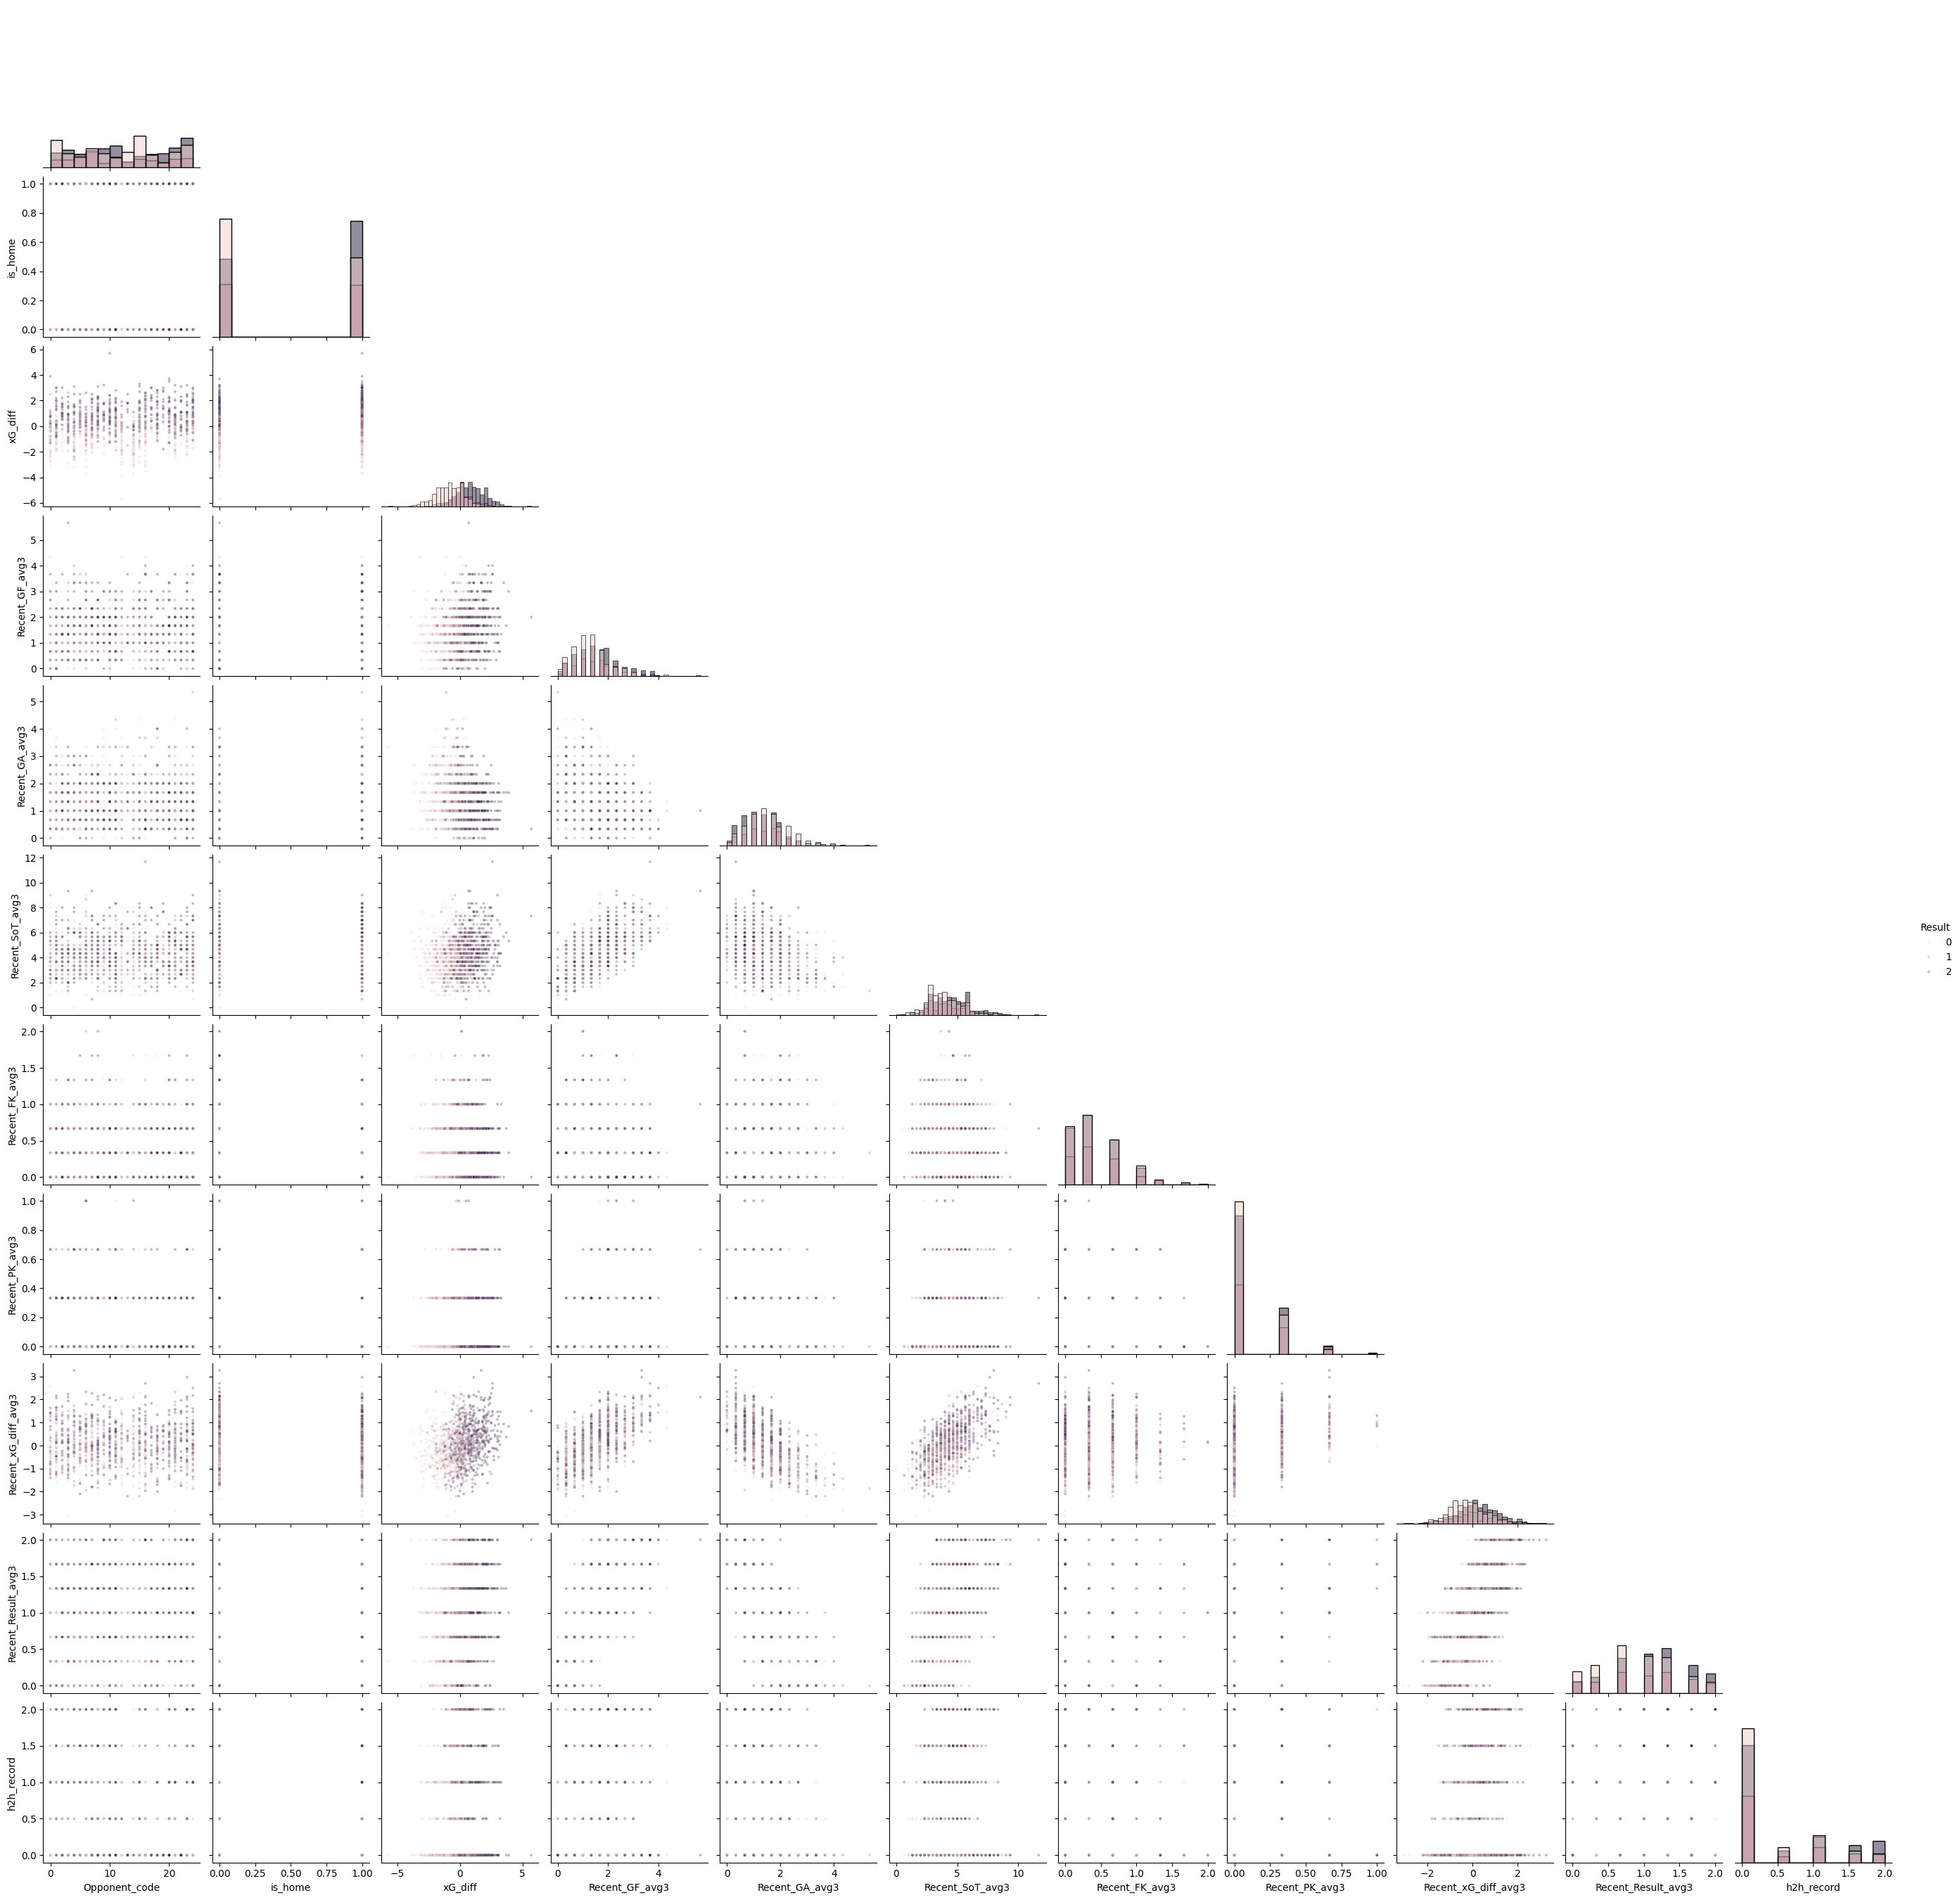

In [191]:
feature_cols = (['Opponent_code', 'is_home', 'xG_diff', 'Recent_GF_avg3',
                 'Recent_GA_avg3', 'Recent_SoT_avg3', 'Recent_FK_avg3', 'Recent_PK_avg3',
                 'Recent_xG_diff_avg3', 'Recent_Result_avg3', 'h2h_record'])

df = df.sort_values('Date')
train = df[df['Date'] < '2024-01-01'].dropna(subset = feature_cols + ['Result'])
test  = df[df['Date'] >= '2024-01-01'].dropna(subset = feature_cols + ['Result'])

X_train = train[feature_cols]
y_train = train['Result'].astype(int)

X_test = test[feature_cols]
y_test = test['Result'].astype(int)

plot_df = train[feature_cols + ['Result']].sample(1200, random_state=42)
sns.pairplot(
    plot_df,
    hue='Result',          
    diag_kind='hist',      
    corner=True,          
    plot_kws={'s': 8, 'alpha': 0.3}
)
plt.show()


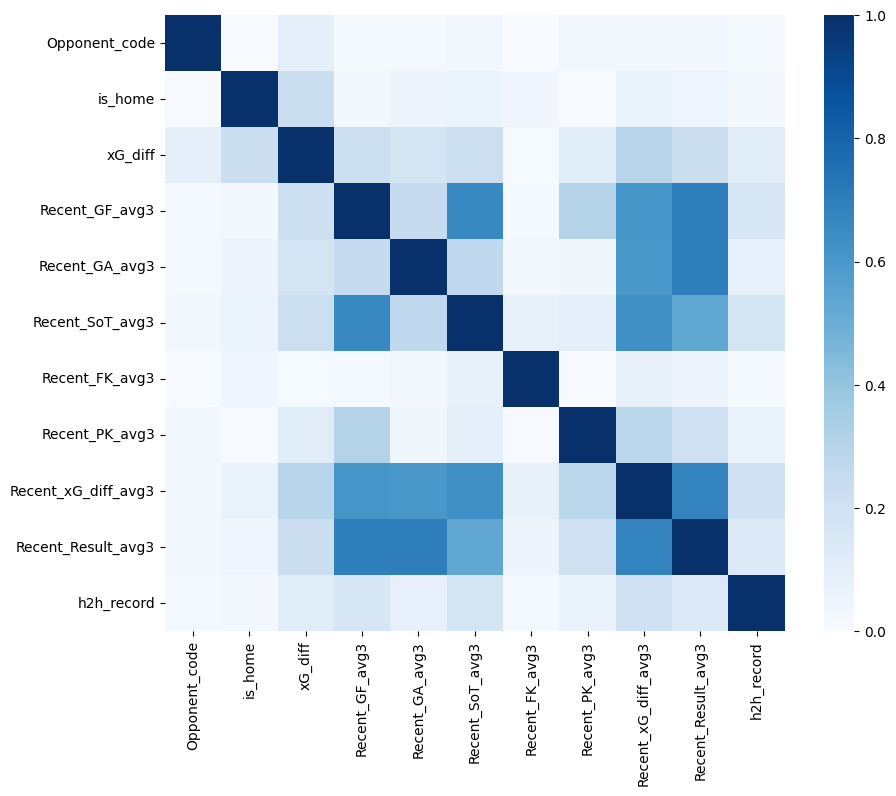

Drop candidates: []


In [192]:
corr = X_train[feature_cols].corr().abs()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='Blues', vmin=0, vmax=1)
plt.show()

threshold = 0.85
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
print("Drop candidates:", to_drop)

### 4-2. Model Evaluation with columns that were feature-engineered with recent three match stats

In [193]:
tscv = TimeSeriesSplit(n_splits=5)

param_grid_rf = {
    'n_estimators':    [100, 200],
    'max_depth':       [5, 10, 20],
    'min_samples_split':[2, 5]
}
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate':[0.01, 0.1],
    'max_depth':    [3, 5]
}
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth':    [3, 5, 7],
    'learning_rate':[0.01, 0.1],
    'subsample':    [0.8, 1.0]
}

results = []
results.append(
    tune_and_evaluate(RandomForestClassifier(random_state=42, class_weight = 'balanced'), param_grid_rf, 'RandomForest')
)
results.append(
    tune_and_evaluate(GradientBoostingClassifier(random_state=42), param_grid_gb, 'GradientBoosting')
)
results.append(
    tune_and_evaluate(xgb.XGBClassifier( eval_metric='mlogloss', random_state=42), param_grid_xgb, 'XGBoost')
)


[RandomForest] Best Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
[RandomForest] Test Macro-F1: 0.5635
              precision    recall  f1-score   support

           L       0.64      0.71      0.67       138
           D       0.40      0.30      0.35        92
           W       0.66      0.69      0.67       138

    accuracy                           0.60       368
   macro avg       0.57      0.57      0.56       368
weighted avg       0.59      0.60      0.59       368


[GradientBoosting] Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
[GradientBoosting] Test Macro-F1: 0.4811
              precision    recall  f1-score   support

           L       0.59      0.75      0.66       138
           D       0.22      0.07      0.10        92
           W       0.63      0.75      0.69       138

    accuracy                           0.58       368
   macro avg       0.48      0.52      0.48       368
weighted avg       0.51      0.

## 5. Test adding draw features to improve precision & recall

           Date Venue  Result  GF  GA         Opponent  xGA  Poss  Sh  SoT  \
0    2021-08-13  Away       0   0   2        Brentford  1.2    64  22    4   
304  2021-08-13  Home       2   2   0          Arsenal  1.3    36   8    3   
114  2021-08-14  Away       0   2   3          Watford  1.2    62  10    1   
2014 2021-08-14  Home       2   3   2      Aston Villa  1.2    38  13    7   
1824 2021-08-14  Away       0   1   3          Everton  2.4    52   6    3   
1672 2021-08-14  Home       0   0   3        Liverpool  1.6    50  14    3   
1444 2021-08-14  Home       2   5   1     Leeds United  0.5    49  16    8   
418  2021-08-14  Away       2   2   1          Burnley  1.5    63  14    6   
532  2021-08-14  Home       0   1   2         Brighton  1.0    37  14    3   
1102 2021-08-14  Home       2   1   0           Wolves  1.3    56   9    5   
608  2021-08-14  Home       2   3   0   Crystal Palace  0.2    62  13    6   
1026 2021-08-14  Away       0   1   5   Manchester Utd  1.5    5

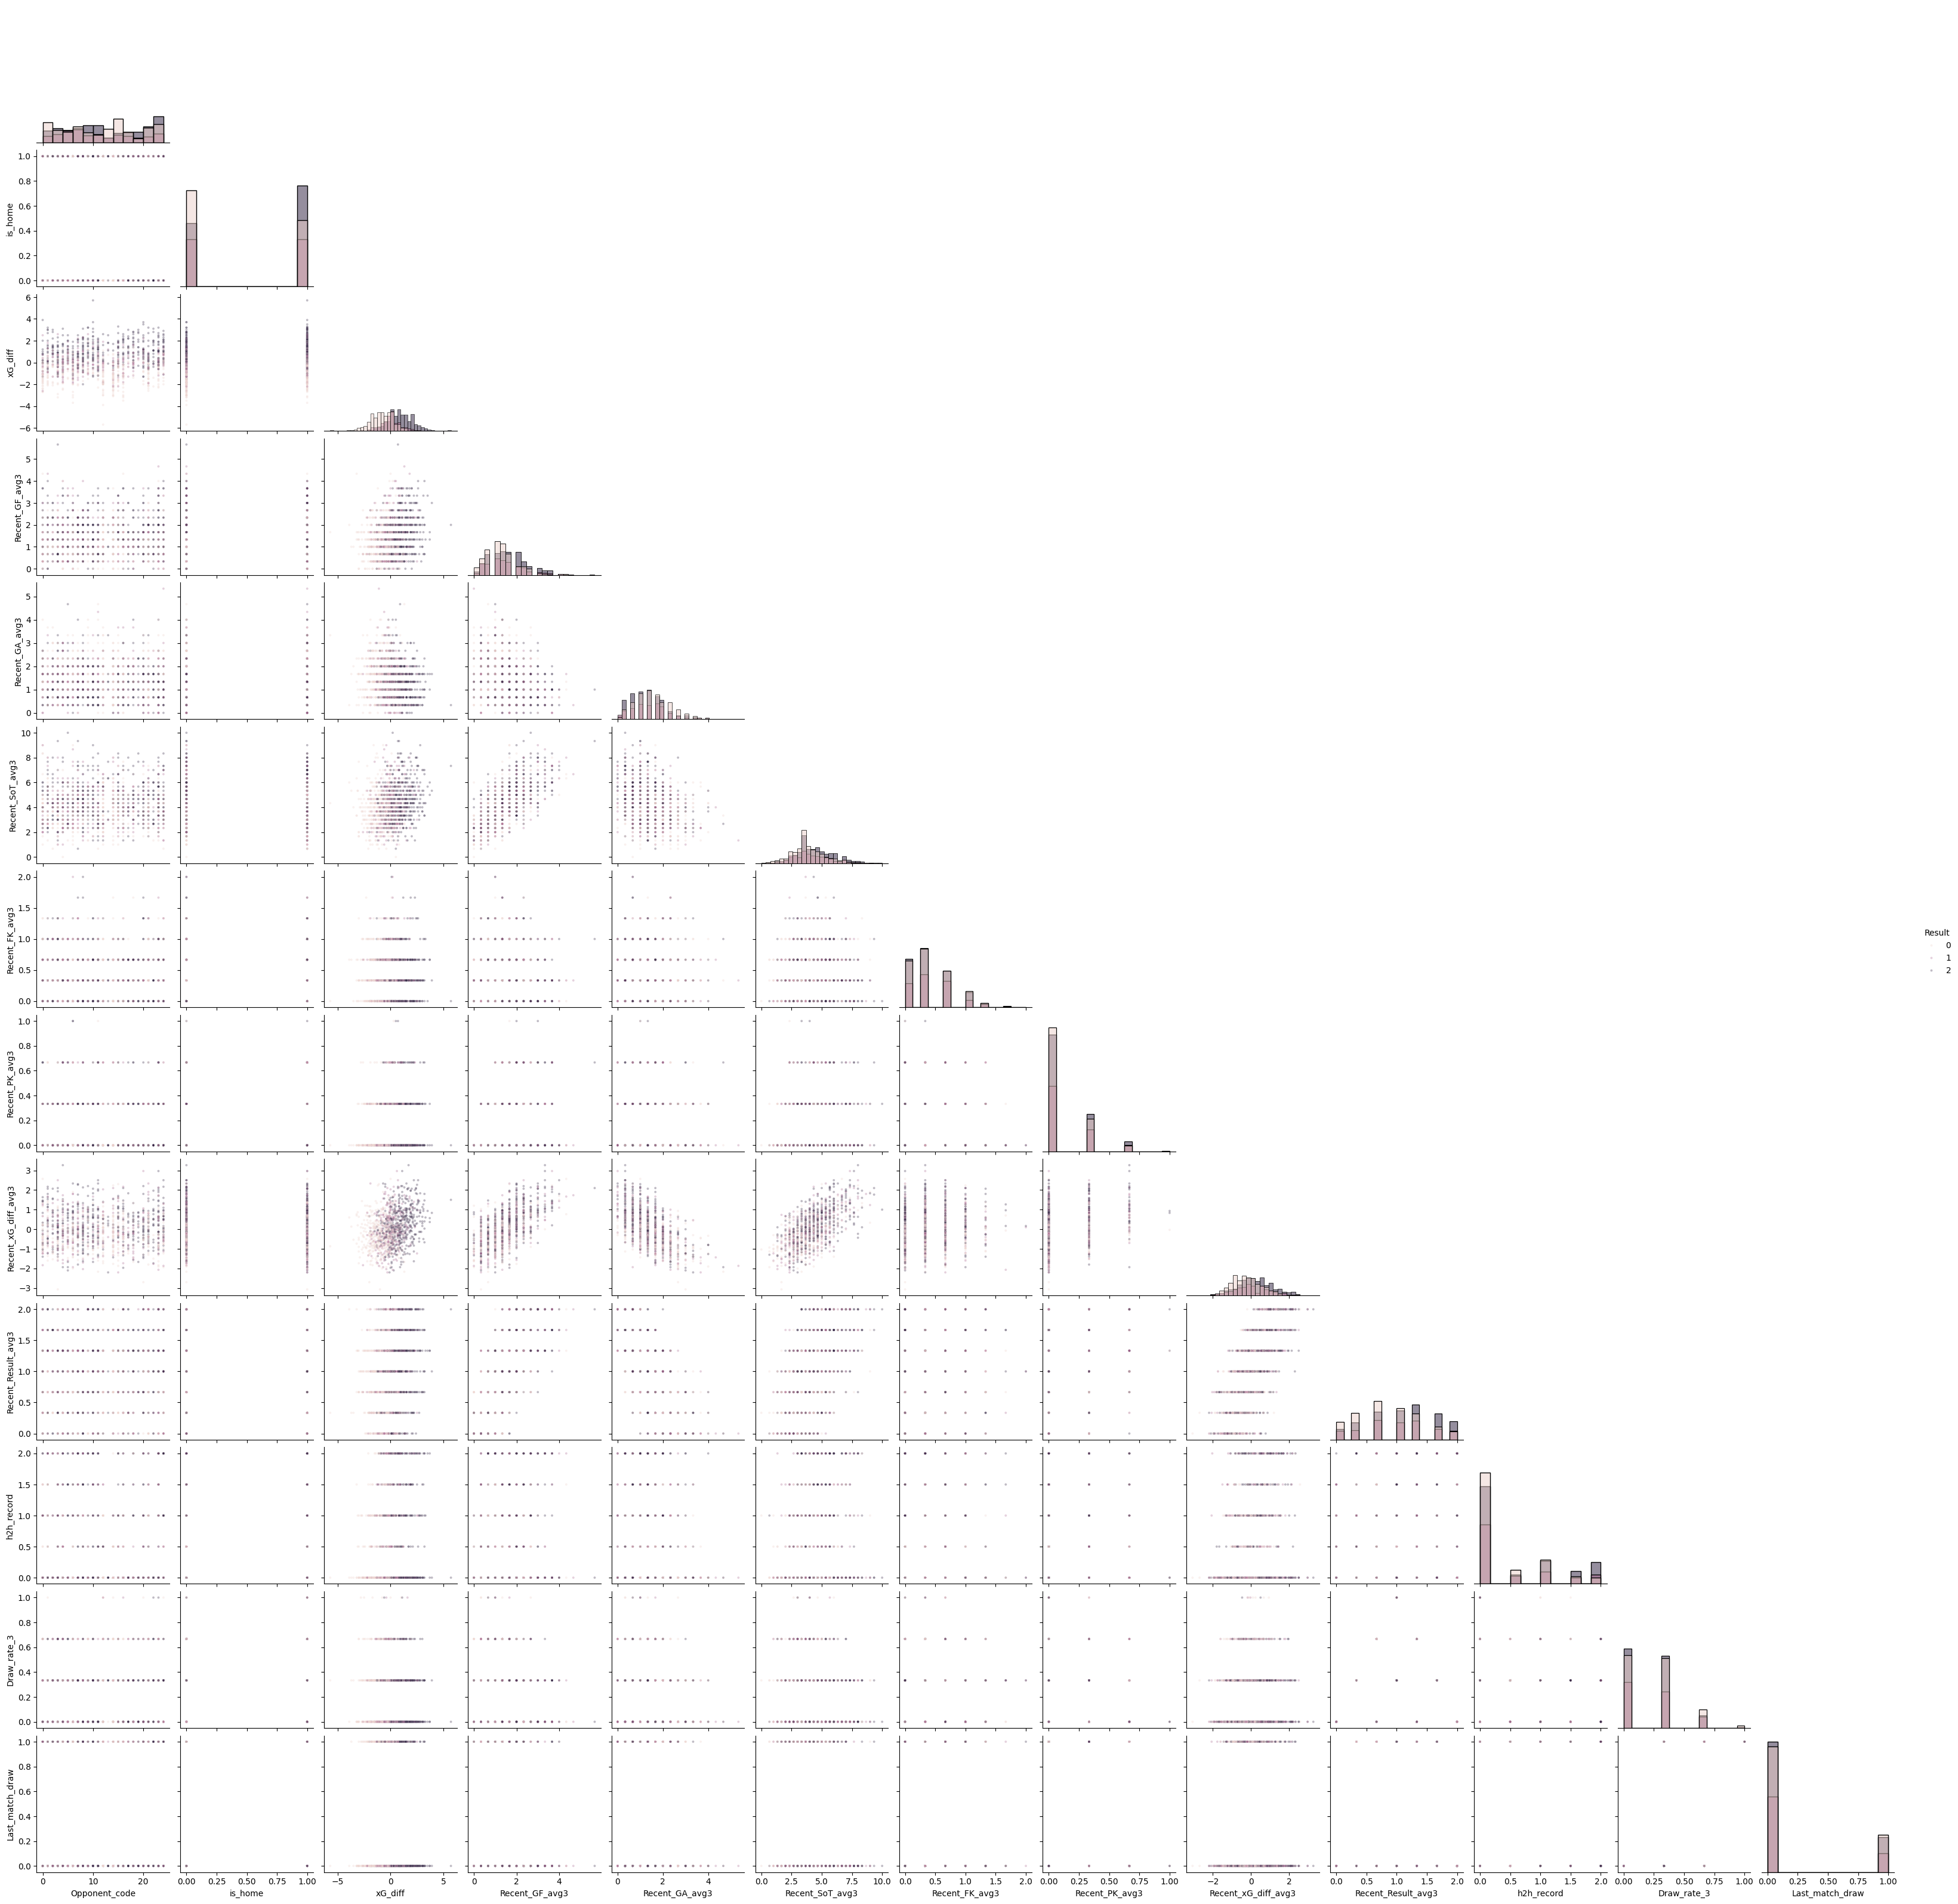

In [194]:
# group by team, get results, get recent three matches, apply mean for result == Draw.

df['Draw_rate_3'] = (
    df.groupby('Team')['Result'] 
    .apply(lambda x: 
        x.shift(1).rolling(window = 3)
        .apply(lambda y: (y == 1).mean())
    ).reset_index(level = 0, drop = True)
) 

print(df.head(30))

df['Last_match_draw'] = df.groupby('Team')['Result'].shift(1).eq(1).astype(int)

# use the recent 3 matches' stats for feature_cols, since the model with recent 3 matches' stats has higher f1-macro score than the model with recent 5 match's stats.
feature_cols = (['Opponent_code', 'is_home', 'xG_diff', 'Recent_GF_avg3',
                 'Recent_GA_avg3', 'Recent_SoT_avg3', 'Recent_FK_avg3', 'Recent_PK_avg3',
                 'Recent_xG_diff_avg3', 'Recent_Result_avg3', 'h2h_record']
                +
                ['Draw_rate_3', 'Last_match_draw'])
df = df.sort_values('Date')
train = df[df['Date'] < '2024-01-01'].dropna(subset = feature_cols + ['Result'])
test  = df[df['Date'] >= '2024-01-01'].dropna(subset = feature_cols + ['Result'])

X_train = train[feature_cols]
y_train = train['Result'].astype(int)

X_test = test[feature_cols]
y_test = test['Result'].astype(int)

plot_df = train[feature_cols + ['Result']].sample(1200, random_state=42)
sns.pairplot(
    plot_df,
    hue='Result',          
    diag_kind='hist',      
    corner=True,          
    plot_kws={'s': 8, 'alpha': 0.3}
)
plt.show()
    


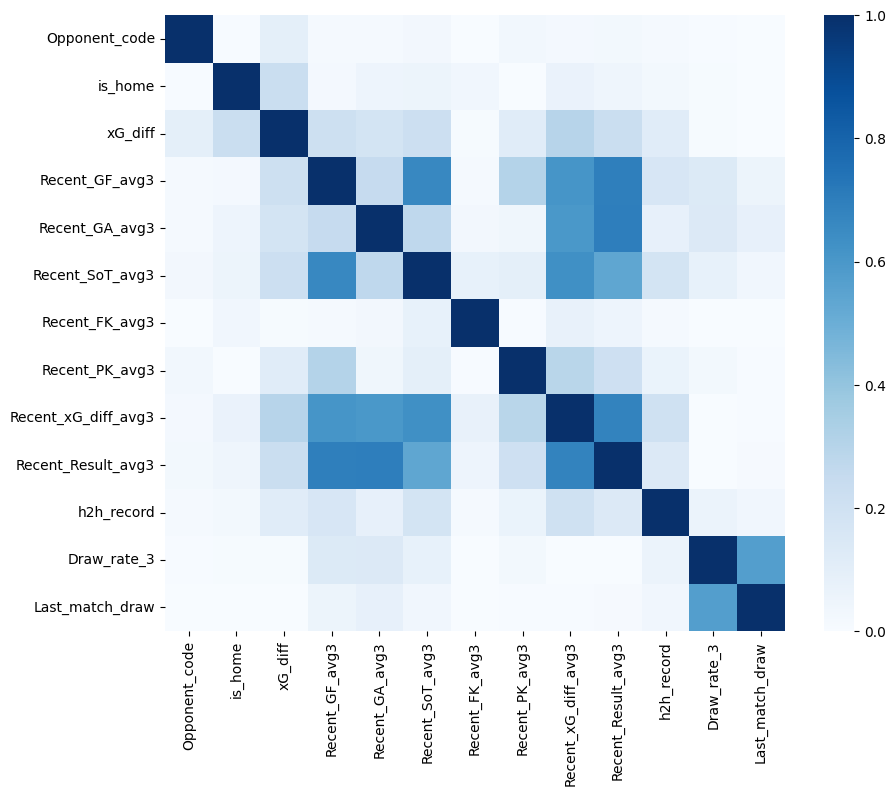

Drop candidates: []


In [195]:
corr = X_train[feature_cols].corr().abs()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='Blues', vmin=0, vmax=1)
plt.show()

threshold = 0.85
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
print("Drop candidates:", to_drop)

## 6. Model re-evaluation after adding draw-related features

In [196]:
tscv = TimeSeriesSplit(n_splits=5)

param_grid_rf = {
    'n_estimators':    [100, 200],
    'max_depth':       [5, 10, 20],
    'min_samples_split':[2, 5]
}
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate':[0.01, 0.1],
    'max_depth':    [3, 5]
}
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth':    [3, 5, 7],
    'learning_rate':[0.01, 0.1],
    'subsample':    [0.8, 1.0]
}

results = []
results.append(
    tune_and_evaluate(RandomForestClassifier(random_state=42, class_weight = 'balanced'), param_grid_rf, 'RandomForest')
)
results.append(
    tune_and_evaluate(GradientBoostingClassifier(random_state=42), param_grid_gb, 'GradientBoosting')
)
results.append(
    tune_and_evaluate(xgb.XGBClassifier( eval_metric='mlogloss', random_state=42), param_grid_xgb, 'XGBoost')
)



[RandomForest] Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
[RandomForest] Test Macro-F1: 0.5411
              precision    recall  f1-score   support

           L       0.64      0.73      0.68       138
           D       0.39      0.18      0.25        92
           W       0.63      0.76      0.69       138

    accuracy                           0.61       368
   macro avg       0.55      0.56      0.54       368
weighted avg       0.57      0.61      0.58       368


[GradientBoosting] Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
[GradientBoosting] Test Macro-F1: 0.4841
              precision    recall  f1-score   support

           L       0.59      0.72      0.65       138
           D       0.24      0.10      0.14        92
           W       0.62      0.72      0.66       138

    accuracy                           0.57       368
   macro avg       0.48      0.51      0.48       368
weighted avg       0.51      0

In [200]:
feature_cols = (['Opponent_code', 'is_home', 'xG_diff', 'Recent_GF_avg3',
                 'Recent_GA_avg3', 'Recent_SoT_avg3', 'Recent_FK_avg3', 'Recent_PK_avg3',
                 'Recent_xG_diff_avg3', 'Recent_Result_avg3', 'h2h_record']) 

# use only the original feature set (no Draw_rate_3 / Last_match_draw)
# because this configuration achieved higher macro-F1 and didn’t force the hyperparameters into an over-complex and overfit area.

df = df.sort_values('Date')
train = df[df['Date'] < '2024-01-01'].dropna(subset = feature_cols + ['Result'])
test  = df[df['Date'] >= '2024-01-01'].dropna(subset = feature_cols + ['Result'])

X_train = train[feature_cols]
y_train = train['Result'].astype(int)

X_test = test[feature_cols]
y_test = test['Result'].astype(int)
name, best_model, f1 = tune_and_evaluate(RandomForestClassifier(random_state=42, class_weight = 'balanced'), param_grid_rf, 'RandomForest')
final_model = best_model
print(final_model)


[RandomForest] Best Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
[RandomForest] Test Macro-F1: 0.5633
              precision    recall  f1-score   support

           L       0.63      0.68      0.66       138
           D       0.39      0.32      0.35        92
           W       0.67      0.70      0.69       138

    accuracy                           0.60       368
   macro avg       0.56      0.57      0.56       368
weighted avg       0.59      0.60      0.59       368

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5, n_estimators=200, random_state=42)


In [198]:
import joblib

joblib.dump({
    'model': final_model,
    'feature_cols': feature_cols
}, 'premier_model.pkl')

['premier_model.pkl']

In [199]:
print(df.head(20))

           Date Venue  Result  GF  GA         Opponent  xGA  Poss  Sh  SoT  \
0    2021-08-13  Away       0   0   2        Brentford  1.2    64  22    4   
304  2021-08-13  Home       2   2   0          Arsenal  1.3    36   8    3   
2166 2021-08-14  Away       0   0   1   Leicester City  0.5    44  17    3   
1178 2021-08-14  Away       2   3   0     Norwich City  1.4    50  19    6   
722  2021-08-14  Away       0   0   3          Chelsea  0.7    38   4    1   
836  2021-08-14  Home       2   3   1      Southampton  0.8    48  14    6   
1026 2021-08-14  Away       0   1   5   Manchester Utd  1.5    51  10    3   
608  2021-08-14  Home       2   3   0   Crystal Palace  0.2    62  13    6   
1102 2021-08-14  Home       2   1   0           Wolves  1.3    56   9    5   
532  2021-08-14  Home       0   1   2         Brighton  1.0    37  14    3   
418  2021-08-14  Away       2   2   1          Burnley  1.5    63  14    6   
1444 2021-08-14  Home       2   5   1     Leeds United  0.5    4